# DATA ANALYTICS INDUSTRY SALARIES EDA

This dataset consists of salaries for Data Scientists, Machine Learning Engineers, Data Analysts, Data Engineers in various cities across India in 2022. I got this data from Kaggle.
Here our main objective is to gain insights about the Analytics domain. In this analysis, I'm using python language and libraries like pandas, matplotlib and seaborn.

## Attributes in the dataset

- **Company Name** - Name of the Company
- **Job title** - Job Position or Designation
- **Salaries Reported** - Number of times the Salary is being Reported
- **Location** - Location of the Company
- **Salary** - Total Compensation in Indian Rupee(₹)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading and Checking the Dataset

In [2]:
salaries_df=pd.read_csv("C:/Users/CHIRA/Downloads/Salary Dataset.csv")
salaries_df.sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
1034,Datametica,Data Scientist,2.0,Pune,"₹9,83,550/yr"
1171,Tops Office Pros Business Services,Data Scientist,1.0,Pune,"₹6,19,069/yr"
831,Allegion,Data Scientist,1.0,Bangalore,"₹12,88,025/yr"
1130,Goodwill,Data Scientist,1.0,Pune,"₹6,19,069/yr"
2169,Professional,Data Analyst,6.0,Pune,"₹33,204/mo"
4091,Onward Assist,Machine Learning Engineer,1.0,Hyderabad,"₹7,12,666/yr"
2294,Itouch Infotronics,Data Analyst,1.0,Pune,"₹6,81,045/yr"
2782,Decimal Point Analytics,Data Analyst,4.0,Mumbai,"₹16,537/mo"
1735,Sopra Steria,Data Scientist,1.0,New Delhi,"₹5,04,488/yr"
651,Indecomm Global Services,Data Scientist,1.0,Bangalore,"₹14,98,750/yr"


In [3]:
#checking the shape of the dataset
salaries_df.shape

(4344, 5)

In [4]:
#number of columns present in the dataset
salaries_df.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary'], dtype='object')

In [5]:
#informations about the dataset
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [6]:
salaries_df.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [7]:
#checking for null values
salaries_df.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [8]:
#checking for duplicate values
salaries_df.duplicated().sum()

0

In [9]:
#unique values in job titles
salaries_df["Job Title"].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [10]:
#unique values in company name
salaries_df["Company Name"].unique()

array(['Mu Sigma', 'IBM', 'Tata Consultancy Services', ...,
       'Myraa Technologies', 'TaiyōAI', 'Market Pulse Technologies'],
      dtype=object)

In [11]:
#number of unique commpany names
salaries_df["Company Name"].nunique()

2529

In [12]:
#unique values in company location
salaries_df["Location"].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

## Data cleaning 

In [13]:
#removing rows containing null values
salaries_df = salaries_df.dropna(axis = 0)
#checking for null values
salaries_df.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [14]:
#removing currency type from salary column
salaries_df['Currency'] = salaries_df['Salary'].str.slice(0, 1)
#checking for currency types
salaries_df['Currency'].unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [15]:
salaries_df.loc[salaries_df['Salary'].str.contains('A', case = False)]

,Company Name,Job Title,Salaries Reported,Location,Salary,Currency
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",A


In [16]:
#changing the currency to AFN
salaries_df.at[2278, 'Currency'] = "AFN"
#checking currency types
salaries_df['Currency'].unique()

array(['₹', '$', '£', 'AFN'], dtype=object)

In [17]:
#separating working duration from salary column
salaries_df['Working Duration'] = salaries_df['Salary'].str.split('/', 1, expand = True)[1]
#checking unique working durations
salaries_df['Working Duration'].unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [18]:
#separating salary amount from salary column
salaries_df['Salary Amount'] = salaries_df['Salary'].str.split('/', 1, expand = True)[0].str.slice(1)
salaries_df['Salary Amount'] = salaries_df['Salary Amount'].str.replace(',', '')
salaries_df['Salary Amount']

0        648573
1       1191950
2        836874
3        669578
4        944110
         ...   
4339       5180
4340     751286
4341     410952
4342    1612324
4343     939843
Name: Salary Amount, Length: 4339, dtype: object

In [19]:
salaries_df.at[2278, 'Salary Amount'] = 156179
salaries_df[salaries_df['Salary Amount'].isin([156179])]

,Company Name,Job Title,Salaries Reported,Location,Salary,Currency,Working Duration,Salary Amount
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",AFN,yr,156179


In [20]:
#changing datatypes of columns
salaries_df['Salaries Reported'] = salaries_df['Salaries Reported'].astype(np.int64)
salaries_df['Salary Amount'] = salaries_df['Salary Amount'].astype(float)

In [21]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4339 non-null   object 
 1   Job Title          4339 non-null   object 
 2   Salaries Reported  4339 non-null   int64  
 3   Location           4339 non-null   object 
 4   Salary             4339 non-null   object 
 5   Currency           4339 non-null   object 
 6   Working Duration   4339 non-null   object 
 7   Salary Amount      4339 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 434.1+ KB


In [22]:
#changing all salary amount in salary per annum
salaries_df['Salary Amount'].loc[salaries_df['Working Duration'] == 'mo'] = salaries_df['Salary Amount'] * 12
salaries_df['Salary Amount'].loc[salaries_df['Working Duration'] == 'hr'] = salaries_df['Salary Amount'] * 480

In [23]:
#converting salary amount in indian currency
salaries_df['Salary Amount'].loc[salaries_df['Currency'] == '$'] = salaries_df['Salary Amount'] * 81.79
salaries_df['Salary Amount'].loc[salaries_df['Currency'] == '£'] = salaries_df['Salary Amount'] * 90.71
salaries_df['Salary Amount'].loc[salaries_df['Currency'] == 'AFN'] = salaries_df['Salary Amount'] * 0.93

In [24]:
#dropping unwanted columns
salaries_df.drop(['Salary', "Currency", "Working Duration"], axis = 1, inplace = True)
#renaming Salary Amount cloumn
salaries_df = salaries_df.rename({'Salary Amount' : 'Salary'}, axis = 1)
#checking our cleaned dataset
salaries_df.sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
2862,Alpha Alternatives,Data Analyst,2,Mumbai,187404.0
1090,Capgemini Invent,Data Scientist,1,Pune,1300000.0
2045,Accentue,Data Analyst,4,Bangalore,763696.0
1375,Jotter,Data Scientist,9,Hyderabad,915028.0
1772,Infosys,Data Scientist,4,Mumbai,1102095.0
2166,Barclays,Data Analyst,10,Pune,861638.0
587,Nityo Infotech,Data Scientist,1,Bangalore,401958.0
2473,Marten Transport,Data Analyst,1,Hyderabad,517757.0
3884,Careerera,Machine Learning Engineer,1,Bangalore,1236115.0
634,TeamLease Staffing Solutions,Data Scientist,1,Bangalore,506989.0


In [25]:
#changing datatype of salary as int
salaries_df['Salary'] = salaries_df['Salary'].astype(np.int64)

In [26]:
salaries_df['Location'].value_counts()

Bangalore    1584
Pune          814
Hyderabad     669
New Delhi     655
Mumbai        617
Name: Location, dtype: int64

In [27]:
salaries_df['Job Title'].value_counts()

Data Scientist                          1844
Data Analyst                             988
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

In [28]:
salaries_df["Salaries Reported"].value_counts()[:5]

1    2501
2     735
3     382
4     180
5     124
Name: Salaries Reported, dtype: int64

In [29]:
#calculating maximum, minimum, mean and meadian salary
print("Maximum Salary : ₹", round(salaries_df['Salary'].max()))
print("Minimum Salary : ₹", round(salaries_df['Salary'].min()))
print("Mean Salary : ₹", round(salaries_df['Salary'].mean()))
print("Average Salary : ₹", round(salaries_df['Salary'].median()))

Maximum Salary : ₹ 151921289
Minimum Salary : ₹ 10814
Mean Salary : ₹ 1114969
Average Salary : ₹ 706283


## Data Visualization

Text(0.5, 1.0, 'Location vs Number Of Salaries Reported')

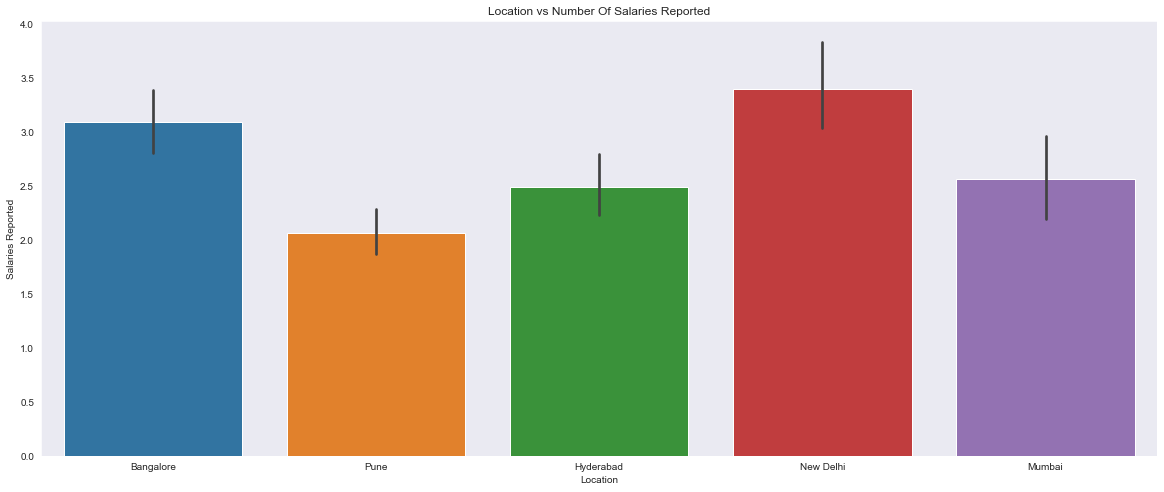

In [30]:
#bar plot for location vs number of salaries reported\
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.barplot(x = salaries_df['Location'], y = salaries_df['Salaries Reported'])
plt.title("Location vs Number Of Salaries Reported")

New Delhi reported the highest number of salaries

Text(0.5, 1.0, 'Salary vs Location')

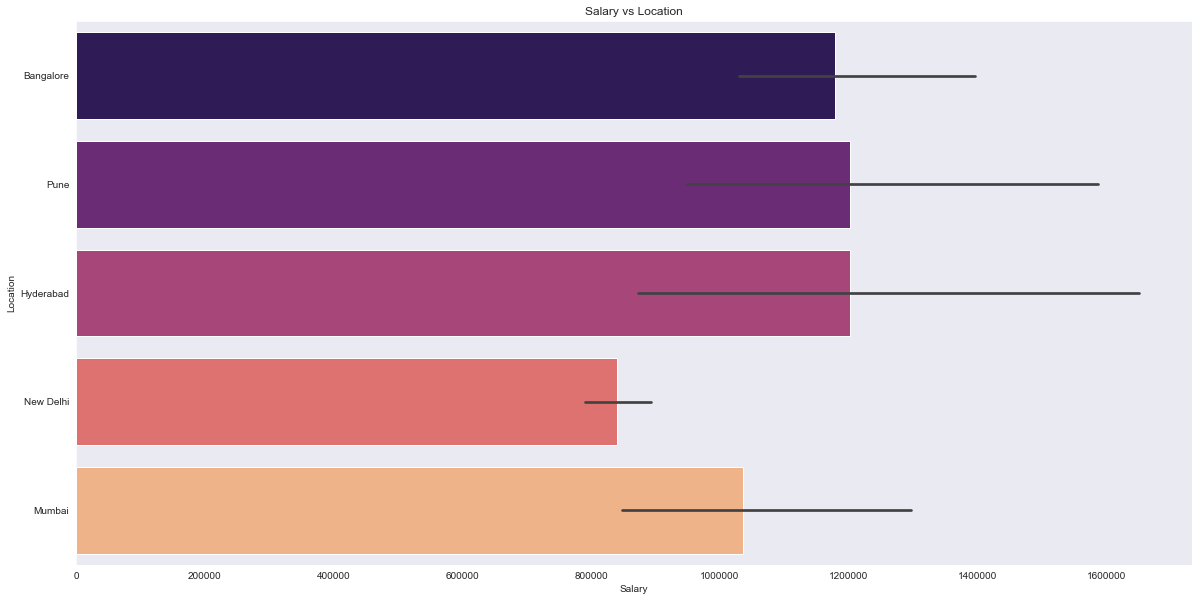

In [31]:
#bar plot for salary vs location
plt.figure(figsize=(20,10))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = salaries_df['Salary'], y = salaries_df['Location'], palette = 'magma')
plt.title("Salary vs Location")

Pune and Hyderabad recorded highest salaries

<AxesSubplot:xlabel='Company Name', ylabel='Salary'>

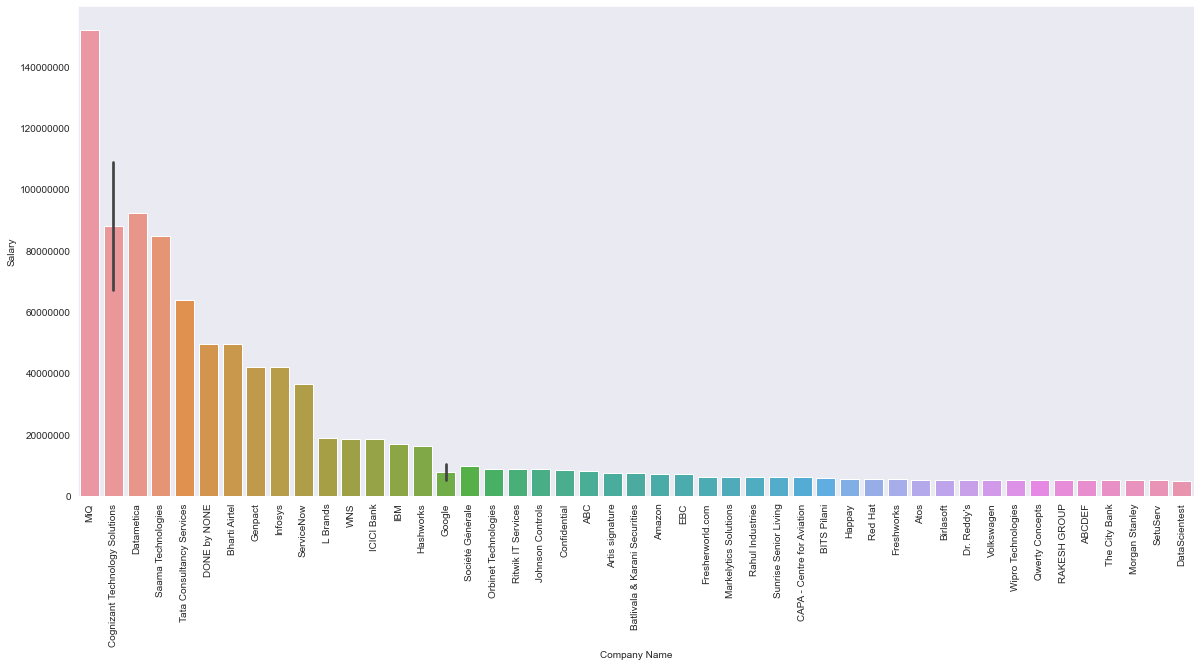

In [32]:
#bar plot for company vs salary
plt.figure(figsize=(20,9))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
sns.set_style("whitegrid")
salaries_df.sort_values('Salary', axis = 0, ascending = False, inplace = True)
sns.barplot(y = salaries_df['Salary'][:50], x = salaries_df['Company Name'][:50])

The Company named "MiQ" recorded Highest Salary

(-1.2430174798693814,
 1.420937095840365,
 -1.218397792292555,
 1.1326866843823638)

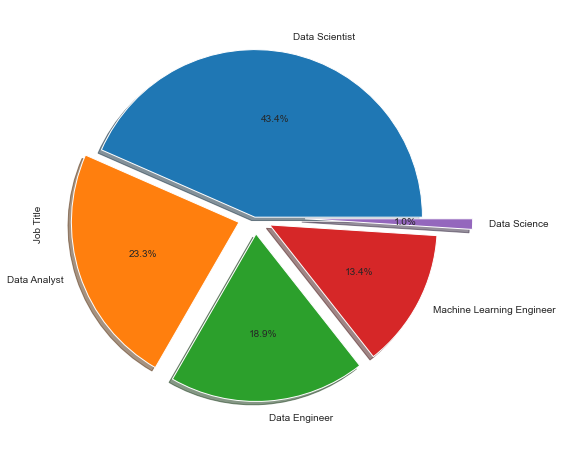

In [45]:
#pie chart find top reported jobs
explode = (0, 0.1, 0.1, 0.1, 0.3)
salaries_df['Job Title'].value_counts()[:5].plot.pie(figsize = (8, 8),explode = explode, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')

Data Scientists, Data Analyst and Data Engineer jobs have the top three Most Reported Jobs

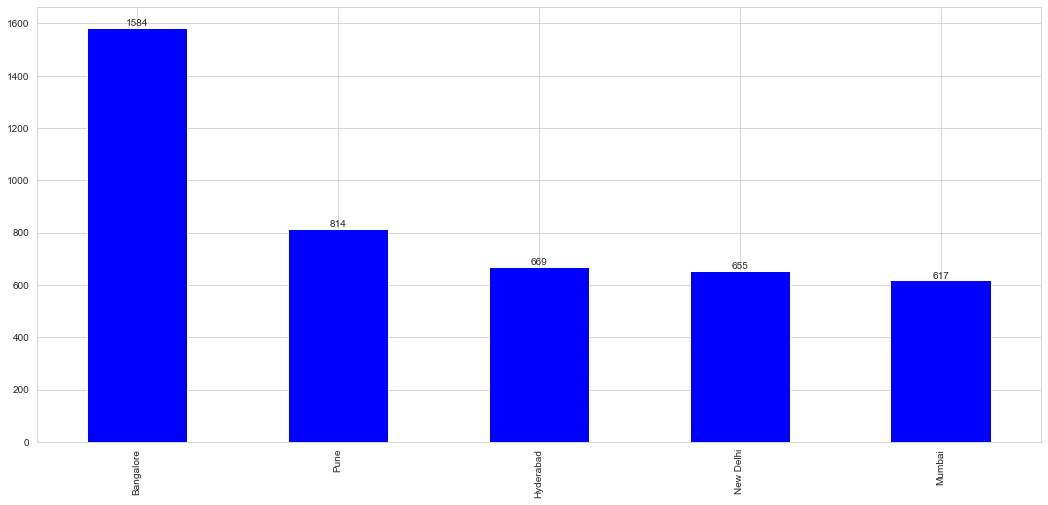

In [34]:
#bar plot number of jobs in a particular location
plt.figure(figsize = (18,8))
bx = salaries_df.Location.value_counts().plot(kind = 'bar', color = 'blue')
for i in bx.containers:
    bx.bar_label(i,)
    

Banglore has the most number of Data Science jobs

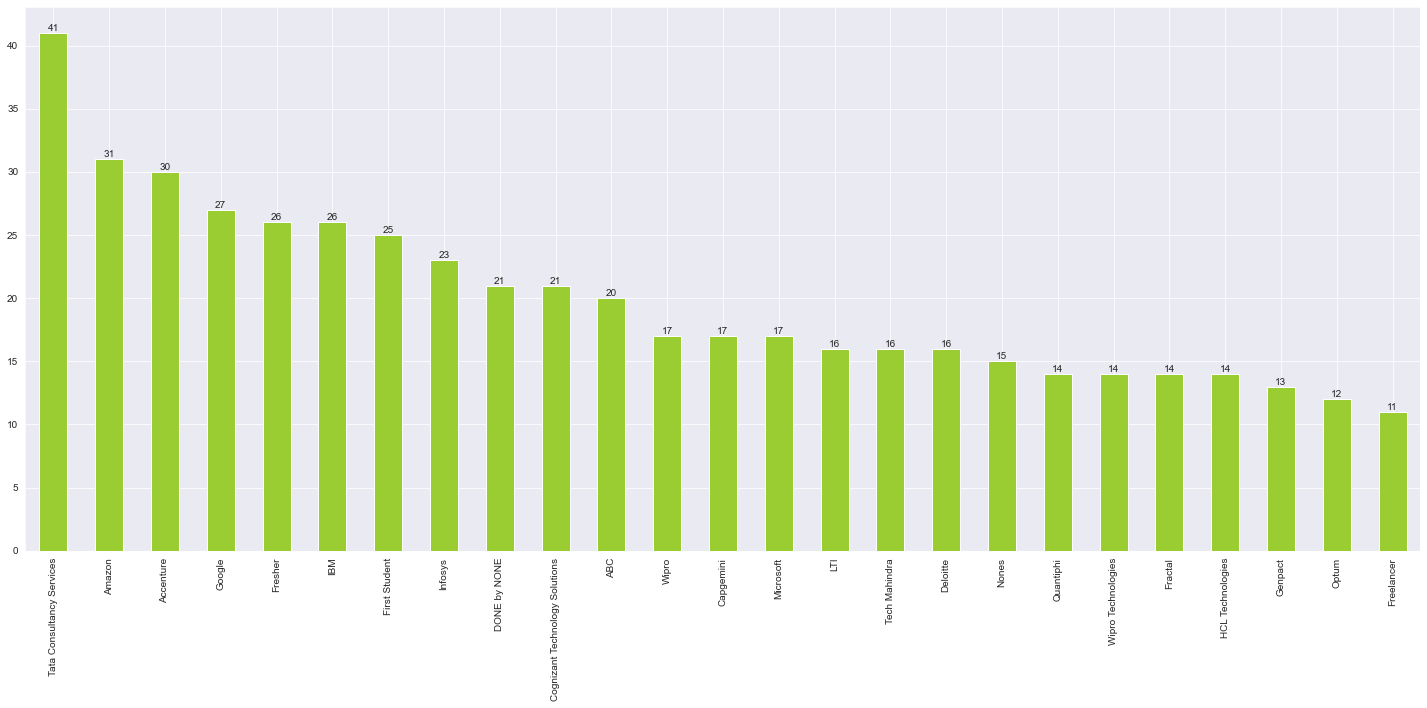

In [35]:
#Top 25 Companies that are reported in the dataset
plt.figure(figsize = (25,10))
sns.set_style("darkgrid")
cx = salaries_df['Company Name'].value_counts()[:25].plot(kind = 'bar', color = 'yellowgreen')
for i in cx.containers:
    cx.bar_label(i,)

Tata Consultancy Services is the most reported Company in the dataset

<AxesSubplot:xlabel='Salary', ylabel='Job Title'>

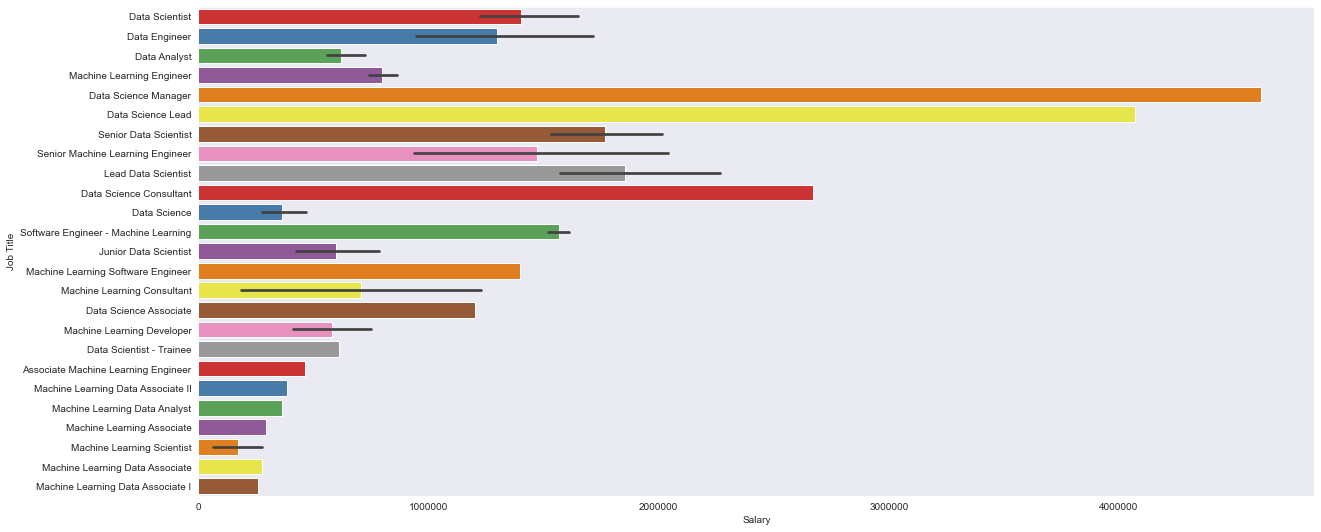

In [36]:
#bar plot for salary vs job title
plt.figure(figsize = (20, 9))
plt.grid()
plt.ticklabel_format(style = 'plain')
salaries_df.sort_values('Salary',axis = 0, ascending = False, inplace = True)
sns.barplot(x = salaries_df['Salary'],y = salaries_df['Job Title'], palette = 'Set1')

Data Science Manager and Data Science Lead reoprted the Highest Salaries among all other Job Types